In [1]:
import pandas as pd # Required for data management
import numpy as np # Required for some computations
import matplotlib.pyplot as plt # Required for plotting

In [2]:
df = pd.read_csv('Woodlands_Piezometer.csv', names=['Y','m','D', 'H', 'M', 'S','DTW_ft', 'DTW_m'], skiprows=1)
qrows = np.concatenate([np.arange(0,10,1),np.arange(-11,-1,1)])
df.iloc[qrows,:]

,Y,m,D,H,M,S,DTW_ft,DTW_m
0,2013,10,1,0,0,0,154.19,46.997112
1,2013,10,1,1,0,0,154.17,46.991016
2,2013,10,1,2,0,0,154.17,46.991016
3,2013,10,1,3,0,0,154.16,46.987968
4,2013,10,1,4,0,0,154.15,46.984920
5,2013,10,1,5,0,0,154.13,46.978824
6,2013,10,1,6,0,0,154.13,46.978824
7,2013,10,1,7,0,0,154.12,46.975776
8,2013,10,1,8,0,0,154.11,46.972728
9,2013,10,1,9,0,0,154.10,46.969680


In [9]:
df['SerDates'] = pd.to_datetime(df.Y*10000+df.m*100+df.D,format='%Y%m%d')
#pd.to_datetime(df.Y*10000+df.m*100+df.D+df.H+df.M+df.S,format='%Y%m%d %H:%M:%S')
df.iloc[qrows,:]

,Y,m,D,H,M,S,DTW_ft,DTW_m,SerDates
0,2013,10,1,0,0,0,154.19,46.997112,2013-10-01
1,2013,10,1,1,0,0,154.17,46.991016,2013-10-01
2,2013,10,1,2,0,0,154.17,46.991016,2013-10-01
3,2013,10,1,3,0,0,154.16,46.987968,2013-10-01
4,2013,10,1,4,0,0,154.15,46.984920,2013-10-01
5,2013,10,1,5,0,0,154.13,46.978824,2013-10-01
6,2013,10,1,6,0,0,154.13,46.978824,2013-10-01
7,2013,10,1,7,0,0,154.12,46.975776,2013-10-01
8,2013,10,1,8,0,0,154.11,46.972728,2013-10-01
9,2013,10,1,9,0,0,154.10,46.969680,2013-10-01


In [11]:
# Use the pandas plotting function, specifying 'SerDates' (the serial datas) on the x axis and 'Q' (discharge)
# on the y axis. I'm also using the 'figsize' option to increase the size of the plotted image
df.plot(x='SerDates', y='DTW_m',figsize=(14,10))

In [12]:
# Use the pandas .values operator to load the values of discharge (the 'Q' column)
# from the pandas dataframe into a numpy array
DTW = df['DTW_m'].values

In [13]:
# Use numpy array indexing to get discharge from October 2, 2000 to September 30, 2015. 
# The 'end' of a numpy array can be indexed using -1: as if the index in the negative direction
# wraps back around to the end of the record
DTWt   = DTW[1:-1] 

# Similarly get discharge from October 1, 2000 to September 29, 2015 by getting data from the 
# beginning of the record to the 'end' minus 1 using the -2 as the index. 
DTWtm1 = DTW[0:-2]

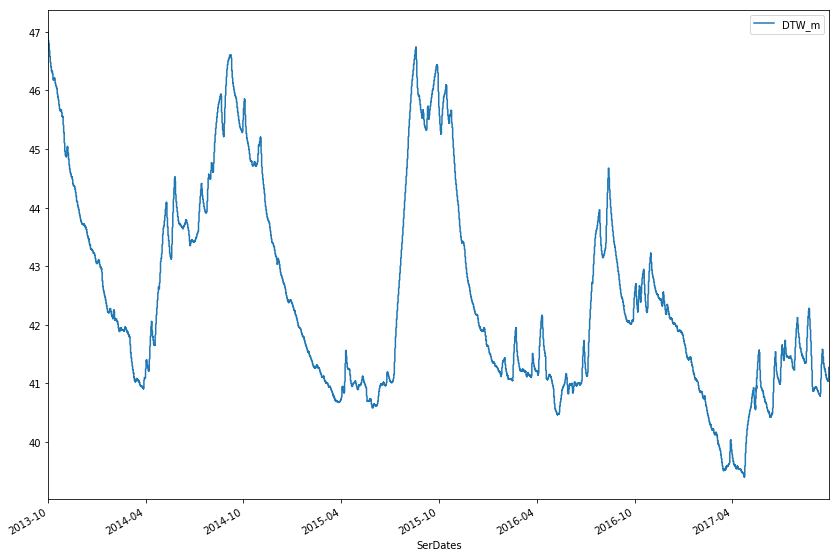

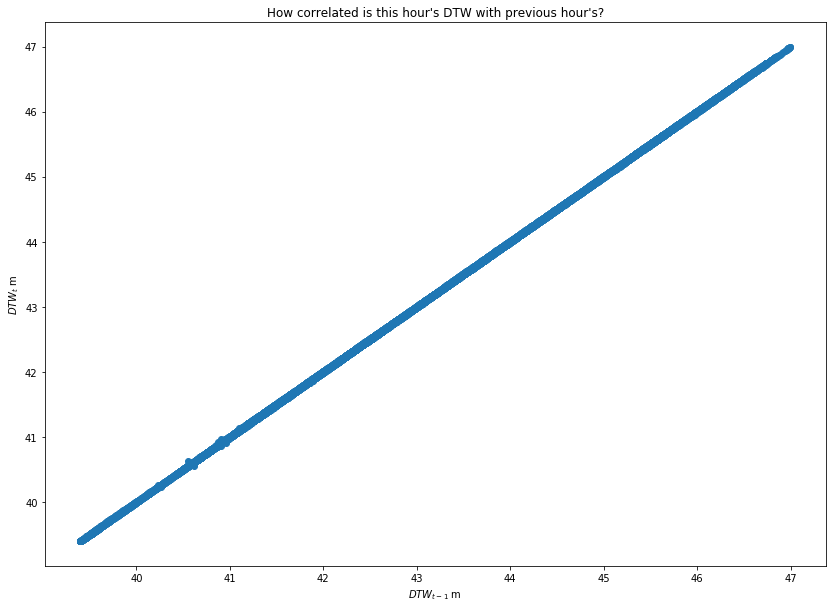

In [14]:
# Use Matplotlib to create a scatter plot of these two time series, create a title and label axes
plt.figure(figsize=(14,10))
plt.plot(DTWtm1,DTWt,'o')
plt.title('How correlated is this hour\'s DTW with previous hour\'s?')
plt.xlabel('$DTW_{t-1}$ m')
plt.ylabel('$DTW_t$ m')
plt.show()

#5. Save the dataframe as a pandas "pickle" file¶

df.to_pickle('WoodlandsDTW_WY2013-2017.pkl')